Accuracy: 98.9333
Accuracy: 98.9667
Accuracy: 98.9833
Accuracy: 99.1250
Accuracy: 98.9417


C:\Users\91800\anaconda3\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\91800\anaconda3\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


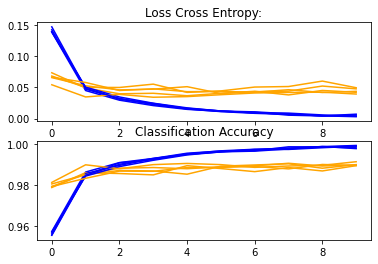

Accuracy: mean=98.990 std=0.070, n=5


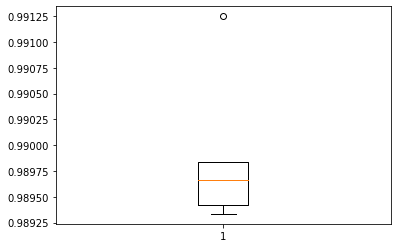

Accuracy : 99.10 

Training Time (in minutes) = 1.662572224934896e-05


In [8]:
# Importing libraries
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from time import time
from keras.optimizers import SGD
from keras.models import load_model
from keras.utils import to_categorical
from keras.datasets import mnist
from matplotlib import pyplot
from numpy import mean
from numpy import std

# Load train and test dataset
def load_dataset():
    # Loading dataset
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    # Reshape the dataset to get a single channel
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    # Target values using one hot encode
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    return X_train, Y_train, X_test, Y_test

# Creating CNN model for training
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    # Adding 2D convolution layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    # Gradient descent (with momentum) optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Purpose of below function is to scale the pixels
def scale_pixels(train, test):
    # Converting train from integers to floats
    train_ftype = train.astype('float32')
    test_ftype = test.astype('float32')
    # Normalizing into range 0-1
    train_norm = train_ftype / 255.0
    test_norm = test_ftype / 255.0
    # Return normalized images
    return train_norm, test_norm


# Estimating a model using k-fold: cross-validation
def estimate_model(X_data, Y_data, n_folds=5):
    counts, records = list(), list()
    # define cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X_data):
        # create model
        model = create_model()
        # select rows for train and test
        X_train, Y_train, X_test, Y_test = X_data[train_ix], Y_data[train_ix], X_data[test_ix], Y_data[test_ix]
        # fit model
        history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=0)
        # evaluate model
        _, acc = model.evaluate(X_test, Y_test, verbose=0)
        print('Accuracy: %.4f' % (acc * 100.0))
        # counts store 
        counts.append(acc)
        records.append(history)
    return counts, records

# plot diagnostic learning curves
def summarize_diagnostics(records):
    for i in range(len(records)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Loss Cross Entropy:')
        pyplot.plot(records[i].history['loss'], color='blue', label='train data')
        pyplot.plot(records[i].history['val_loss'], color='orange', label='test data')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(records[i].history['accuracy'], color='blue', label='train data')
        pyplot.plot(records[i].history['val_accuracy'], color='orange', label='test data')
    pyplot.show()

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

# run the test harness for evaluating a model
def run_test_model():
    # Loading dataset
    X_train, Y_train, X_test, Y_test = load_dataset()
    # Prepare pixel data
    X_train, X_test = scale_pixels(X_train, X_test)
    # Model Computing
    counts, records = estimate_model(X_train, Y_train)
    # define model
    model = create_model()
    # fit model
    model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=0)
    # Loading output model
    model = load_model('final_model.h5')
    # Learning curves
    summarize_diagnostics(records)
    # Summarize estimated performance
    summarize_performance(counts)
    # Estimating model for test dataset
    _, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Accuracy : %.2f ' % (acc * 100.0))

# Entry point, run the test model
run_test_model()
time0 = time()
print("\nTraining Time (in minutes) =", (time() - time0) / 60)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


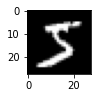

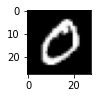

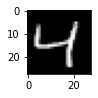

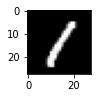

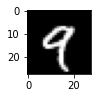

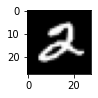

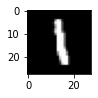

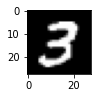

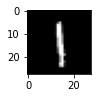

C:\Users\91800\anaconda3\envs\pytorch_env\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


*************
Predicted digit :  5


In [6]:
# Importing keras libraries for testing sample
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot

# Print first ten images from training dataset
def print_trining_sample():
    # load dataset
    (trainX, trainy), (testX, testy) = mnist.load_data()
    # summarize loaded dataset
    print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
    print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
    # plot first few images
    for i in range(9):
        # define subplot
        pyplot.subplot(330 + 1 + i)
        # plot raw pixel data
        pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
        # show the figure
        pyplot.show()

# Load and prepare the image
def process_image(filename):
    # Load the image from function parameter
    sample_image = load_img(filename, grayscale=True, target_size=(28, 28))
    # Converting image into array
    sample_image = img_to_array(sample_image)
    # Reshape into a single sample with 1 channel
    sample_image = sample_image.reshape(1, 28, 28, 1)
    # Prepare pixel data
    sample_image = sample_image.astype('float32')
    sample_image = sample_image / 255.0
    return sample_image

# Load an sample image and predict the digit
def test_sample():
    # Print training sample
    print_trining_sample()
    # Load the sample or test image
    sample_image= process_image('sample_image.png')
    # Load the model
    model = load_model('final_model.h5')
    # Predict the class
    pred_digit = model.predict_classes(sample_image)
    print('*************')
    print('Predicted digit : ',pred_digit[0])

# Testing sample
test_sample()